In [1]:
%matplotlib inline
from cox import readers
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
sns.set()

In [2]:
def filter_df(df, **kwargs):
    for k, v in kwargs.items():
        df = df[df[k] == v]
    return df

In [3]:
r = readers.CollectionReader('../src/kl_direction/agents')

100%|██████████| 320/320 [00:21<00:00, 15.15it/s]


In [4]:
metadata = r.df('metadata')
opt = r.df('optimization')
opt['opt_step'] = opt.index

In [5]:
games =  ["Walker2d-v2", "Humanoid-v2", "Swimmer-v2", "Hopper-v2",
          "HalfCheetah-v2", "InvertedPendulum-v2", "Reacher-v2", "InvertedDoublePendulum-v2"]
code_level_opts = {
      'kl_penalty_direction': ['new_to_old', 'old_to_new'],
      "policy_net_type": ["CtsPolicy", "CtsBetaPolicy"],
}

NUM_BINS = 20

In [6]:
key_metadata = metadata[['exp_id', 'game'] + list(code_level_opts.keys())]
opt = opt.merge(key_metadata, on='exp_id')

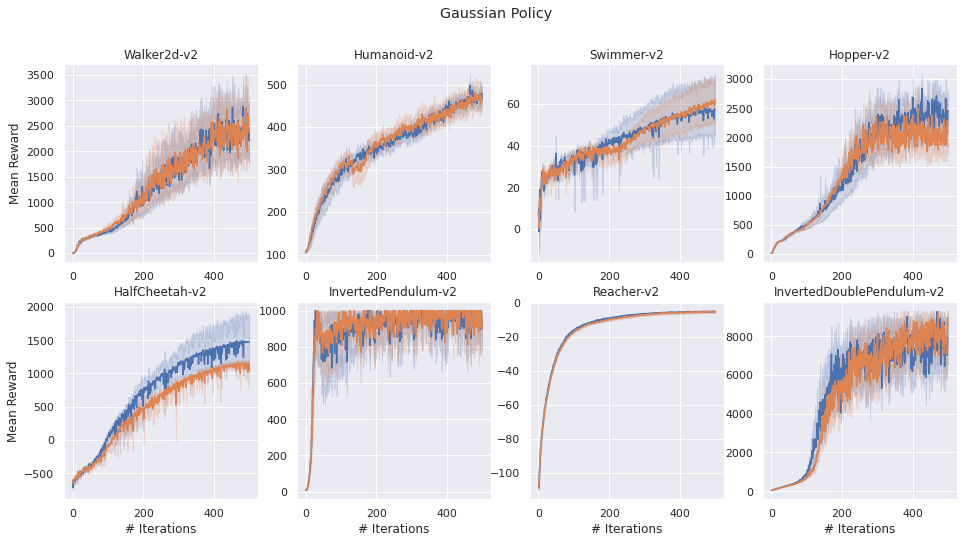

In [7]:
# Plot setup
fig, ax = plt.subplots(2, 4, figsize=(16,8))

for j, g in enumerate(games):
        filt = filter_df(opt, kl_penalty_direction='new_to_old', game=g, policy_net_type='CtsPolicy')
        sns.lineplot(filt.opt_step, filt.mean_reward, n_boot=1000,
                     ax=ax.flatten()[j], label=f"Reverse KL", legend=False)
        filt = filter_df(opt, kl_penalty_direction='old_to_new', game=g, policy_net_type='CtsPolicy')
        sns.lineplot(filt.opt_step, filt.mean_reward, n_boot=1000,
                     ax=ax.flatten()[j], label=f"Forward KL", legend=False)
        ax.flatten()[j].set_title(g)
        
for a in ax.flatten():
    a.set_ylabel('')
    a.set_xlabel('')
for row in ax:
    row[0].set_ylabel('Mean Reward')
for a in ax[-1]:
    a.set_xlabel('# Iterations')
    
fig.suptitle('Gaussian Policy')
plt.show()

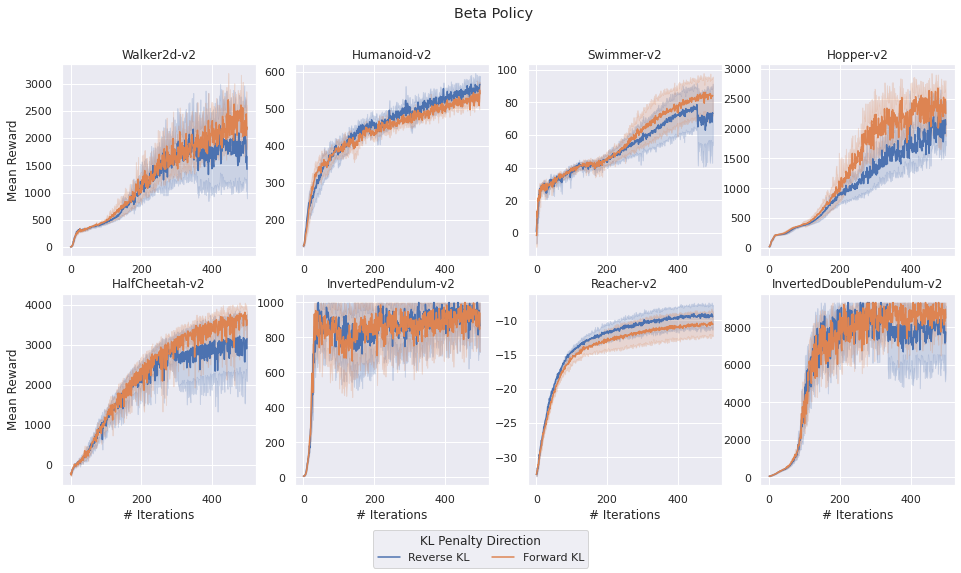

In [8]:
# Plot setup
fig, ax = plt.subplots(2, 4, figsize=(16,8))

for j, g in enumerate(games):
        filt = filter_df(opt, kl_penalty_direction='new_to_old', game=g, policy_net_type='CtsBetaPolicy')
        sns.lineplot(filt.opt_step, filt.mean_reward, n_boot=1000,
                     ax=ax.flatten()[j], label=f"Reverse KL", legend=False)
        filt = filter_df(opt, kl_penalty_direction='old_to_new', game=g, policy_net_type='CtsBetaPolicy')
        sns.lineplot(filt.opt_step, filt.mean_reward, n_boot=1000,
                     ax=ax.flatten()[j], label=f"Forward KL", legend=False)
        ax.flatten()[j].set_title(g)
        
for a in ax.flatten():
    a.set_ylabel('')
    a.set_xlabel('')
for row in ax:
    row[0].set_ylabel('Mean Reward')
for a in ax[-1]:
    a.set_xlabel('# Iterations')
    
fig.suptitle('Beta Policy')
fig.subplots_adjust(bottom=0.15)
handles, labels = ax[-1][-1].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', title='KL Penalty Direction', ncol=2)
plt.show()